In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

    

In [2]:
df = pd.read_csv("C:/Users/merol/Downloads/hr_dashboard_data.csv")  # Adjust filename if different
df.head()


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [4]:

df.describe()


,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,76619.245000
std,9.797318,6.408849,28.530068,28.934353,1.123263,27082.299202
min,22.000000,0.000000,0.000000,0.000000,1.000000,30231.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,53080.500000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,80540.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,101108.250000
max,60.000000,25.000000,98.000000,100.000000,4.900000,119895.000000


In [5]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

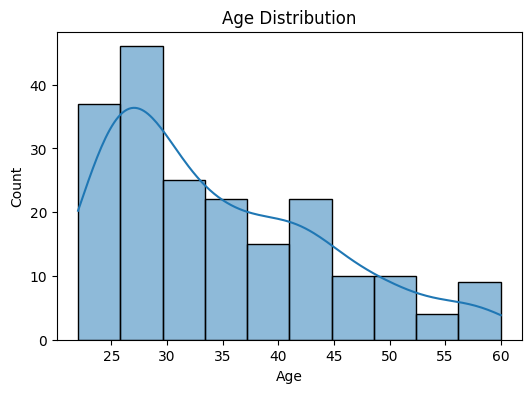

In [7]:
# Histogram for Age
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()




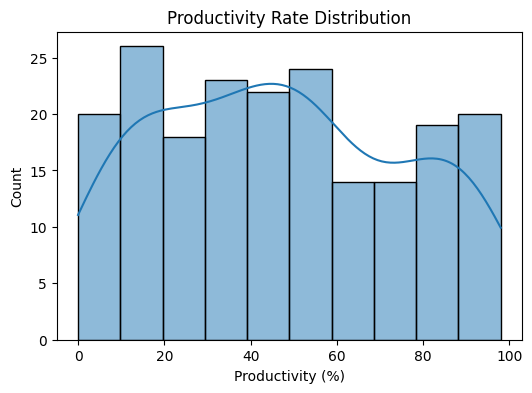

In [8]:
# Histogram for Productivity Rate (%)
plt.figure(figsize=(6, 4))
sns.histplot(df['Productivity (%)'], kde=True, bins=10)
plt.title("Productivity Rate Distribution")
plt.xlabel("Productivity (%)")
plt.ylabel("Count")
plt.show()

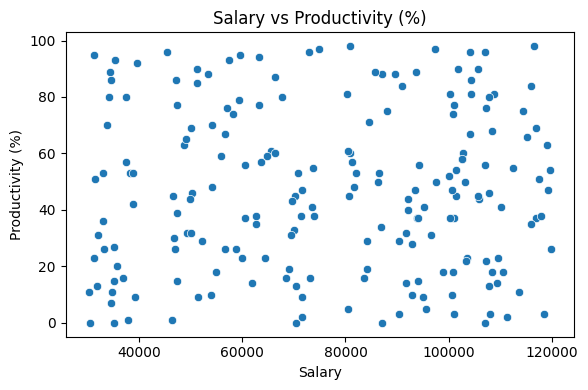

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Salary', y='Productivity (%)', data=df)
plt.title('Salary vs Productivity (%)')
plt.xlabel('Salary')
plt.ylabel('Productivity (%)')
plt.tight_layout()
plt.show()

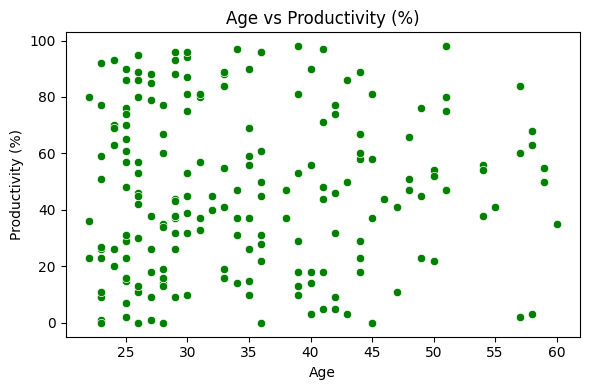

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='Productivity (%)', color='green')
plt.title('Age vs Productivity (%)')
plt.tight_layout()
plt.show()


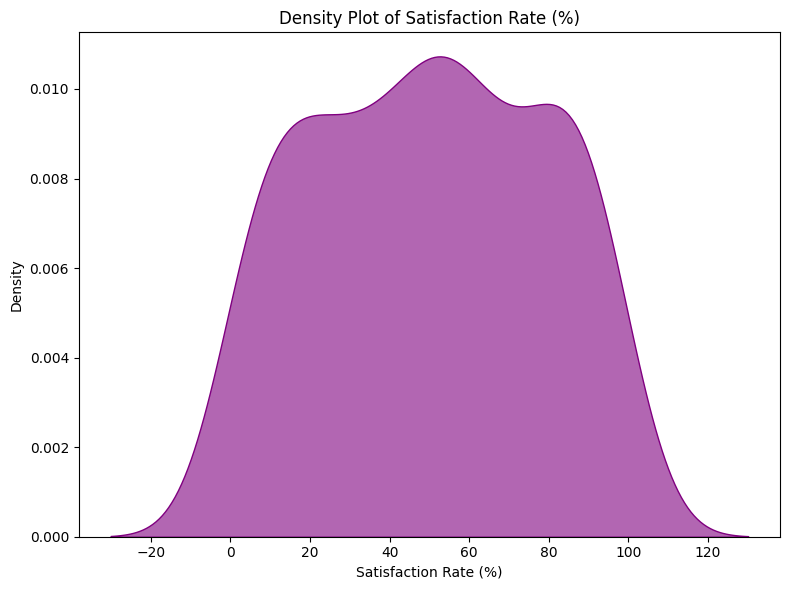

In [11]:

if 'Satisfaction Rate (%)' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df['Satisfaction Rate (%)'], fill=True, color='purple', alpha=0.6)
    plt.title('Density Plot of Satisfaction Rate (%)')
    plt.xlabel('Satisfaction Rate (%)')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Satisfaction Rate (%)' not found in the dataset.")

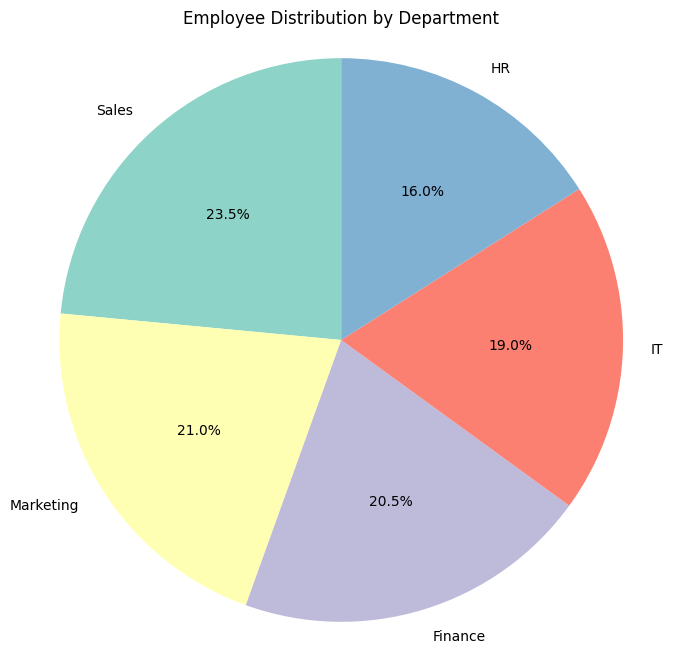

In [12]:
if 'Department' in df.columns:
    department_counts = df['Department'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(department_counts)))
    plt.title('Employee Distribution by Department')
    plt.axis('equal')  
    plt.show()

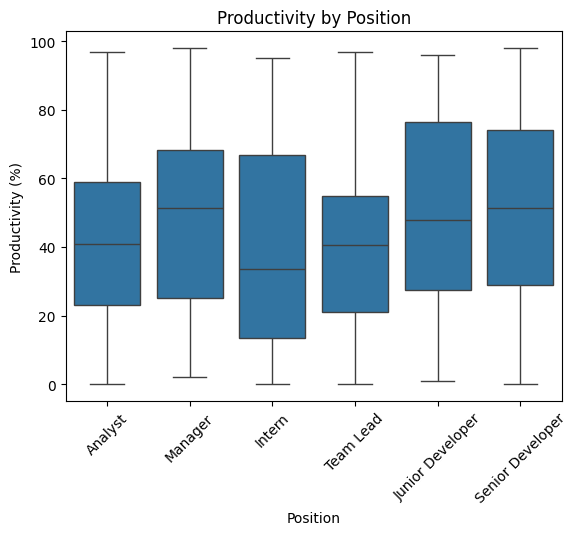

In [13]:
df_plot = df[['Position', 'Productivity (%)']].dropna()
sns.boxplot(x='Position', y='Productivity (%)', data=df_plot)
plt.title('Productivity by Position')
plt.xticks(rotation=45)
plt.show()

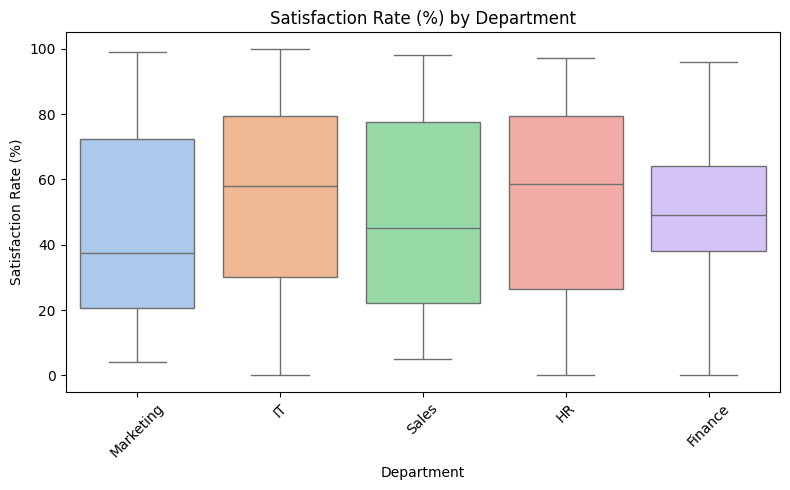

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Department', y='Satisfaction Rate (%)', hue='Department', data=df, palette='pastel', dodge=False)
plt.legend([],[], frameon=False)  # Hides the redundant legend
plt.title('Satisfaction Rate (%) by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

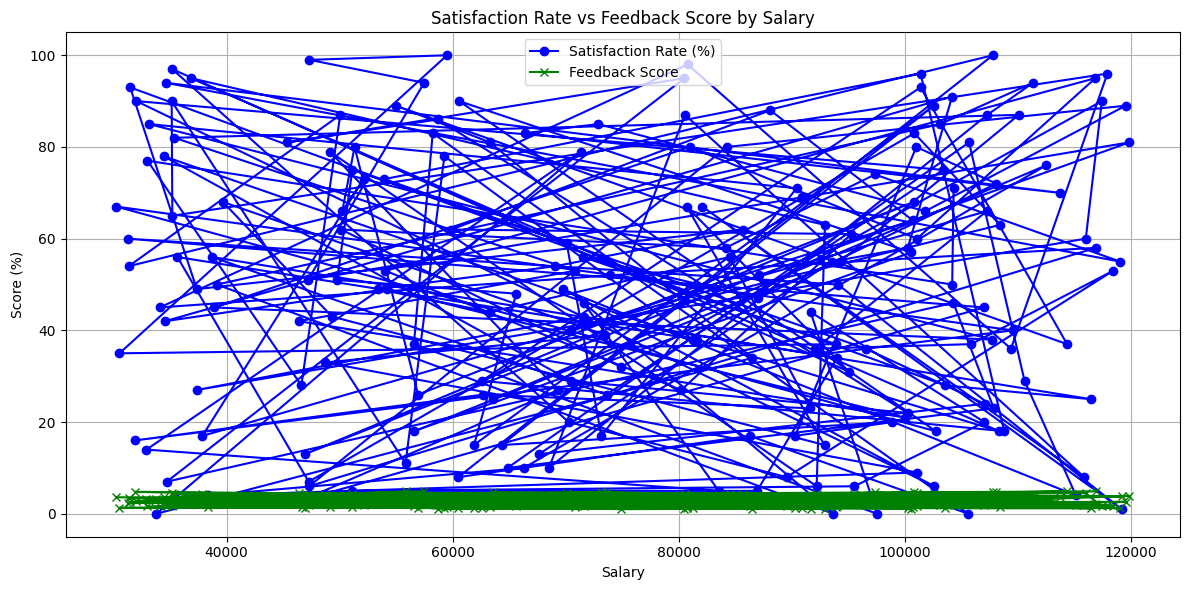

In [15]:
# Plotting both Satisfaction Rate and Feedback Score over Salary
plt.figure(figsize=(12, 6))
plt.plot(df['Salary'], df['Satisfaction Rate (%)'], label='Satisfaction Rate (%)', color='blue', marker='o')
plt.plot(df['Salary'], df['Feedback Score'], label='Feedback Score', color='green', marker='x')

plt.title('Satisfaction Rate vs Feedback Score by Salary')
plt.xlabel('Salary')
plt.ylabel('Score (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

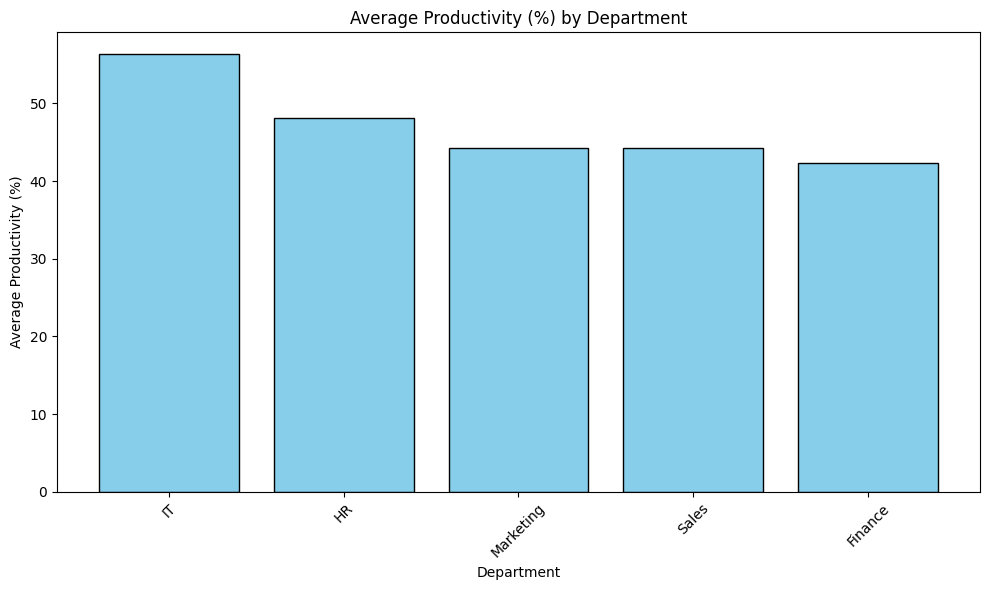

In [16]:
if 'Department' in df.columns and 'Productivity (%)' in df.columns:
    # Group by department and calculate average productivity
    dept_avg = df.groupby('Department')['Productivity (%)'].mean().sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(dept_avg.index, dept_avg.values, color='skyblue', edgecolor='black')
    plt.title('Average Productivity (%) by Department')
    plt.xlabel('Department')
    plt.ylabel('Average Productivity (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('Department', 'Productivity (%)') not found in the dataset.")

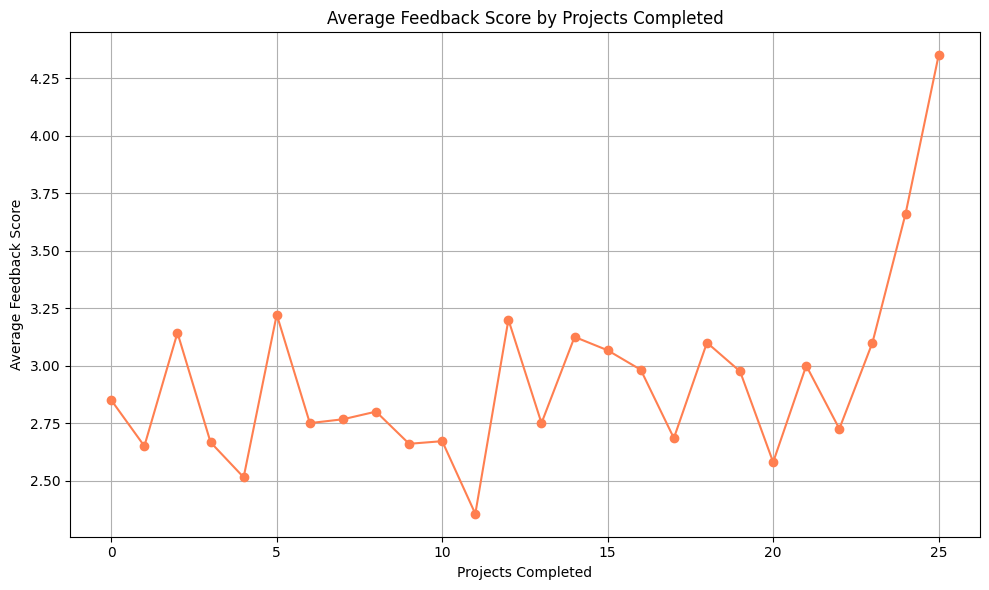

In [17]:
# Group by number of projects completed and calculate average feedback
grouped = df.groupby('Projects Completed')['Feedback Score'].mean().reset_index()

# Sort by number of projects
grouped = grouped.sort_values(by='Projects Completed')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped['Projects Completed'], grouped['Feedback Score'], marker='o', linestyle='-', color='coral')
plt.title('Average Feedback Score by Projects Completed')
plt.xlabel('Projects Completed')
plt.ylabel('Average Feedback Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# For any groupby calls, pass observed=False or observed=True to avoid the warning.
print("Highest Productivity Department:", df.groupby('Department', observed=False)['Productivity (%)'].mean().idxmax())
print("Highest Satisfaction Department:", df.groupby('Department', observed=False)['Satisfaction Rate (%)'].mean().idxmax())
print("Highest Feedback Department:", df.groupby('Department', observed=False)['Feedback Score'].mean().idxmax())

# Gender-wise Productivity
print("Gender-wise Average Productivity:")
print(df.groupby('Gender', observed=False)['Productivity (%)'].mean())

# Productivity by Position
print("Productivity by Position:")
print(df.groupby('Position', observed=False)['Productivity (%)'].mean())

Highest Productivity Department: IT
Highest Satisfaction Department: IT
Highest Feedback Department: Marketing
Gender-wise Average Productivity:
Gender
Female    42.97
Male      50.54
Name: Productivity (%), dtype: float64
Productivity by Position:
Position
Analyst             44.545455
Intern              41.333333
Junior Developer    52.314286
Manager             48.675000
Senior Developer    50.233333
Team Lead           42.375000
Name: Productivity (%), dtype: float64


In [19]:
# Select numeric columns to scale
cols_to_scale = ['Age', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,-0.987435,Male,-0.071174,0.359996,-0.863941,1.621668,Marketing,Analyst,Jan-20,-0.482083
1,Anthony Roberson,2.491611,Female,1.180233,0.289719,0.903093,-0.074077,IT,Manager,Jan-99,1.329684
2,Thomas Miller,-0.475811,Male,-0.540451,1.414157,-1.383657,-0.431076,IT,Analyst,Jan-17,-0.382285
3,Joshua Lewis,-0.885110,Female,-1.635432,0.219441,-1.591543,-1.323574,Marketing,Intern,Jan-22,-1.418358
4,Stephanie Bailey,0.854413,Male,0.398104,-1.537494,-1.418305,1.443169,IT,Team Lead,Jan-05,0.907429
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,-0.578136,Female,-0.384025,-0.518471,1.284218,0.550671,HR,Junior Developer,Jan-19,-0.983481
196,Jeremy Miller,-0.885110,Male,-0.696877,-0.061668,-0.759998,-0.074077,IT,Junior Developer,Jan-21,-1.110783
197,Daniel Pierce,-1.294410,Male,-1.322580,-0.377917,0.937741,-1.145074,Finance,Intern,Jan-21,-1.614956
198,Michael Hernandez,0.138139,Female,1.805936,1.730405,0.002252,0.461421,Marketing,Manager,Jan-05,1.021553
